## Face Transformer - Rethinking model incorporating EfficientNet into ViT


### Connect to Google Drive


In [1]:
import os
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/Face-Transformer")

Mounted at /content/drive


### Listing Directory


In [2]:
!ls

colab.ipynb  efficientnet.ipynb  images   papers	requirements.txt  test.py   vit_pytorch
config.py    eval		 LICENSE  publications	results		  train.py
Data	     image_iter.py	 log	  README.md	test_forward.py   util


### Checking the GPU


In [3]:
!nvidia-smi

Tue Jun 11 08:41:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install the requirements


In [ ]:
!pip install mxnet numpy==1.23.5 vit_pytorch timm einops tensorboardX fvcore pyyaml efficientnet_pytorch

### Visualization of Data


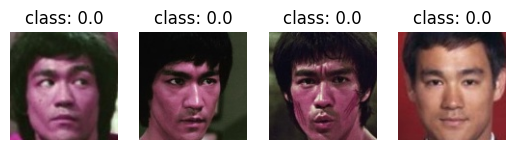

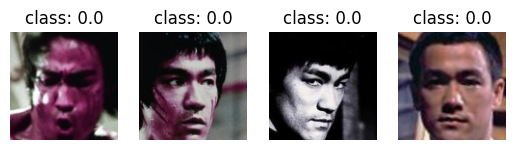

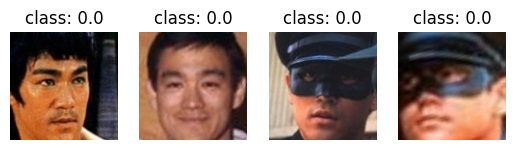

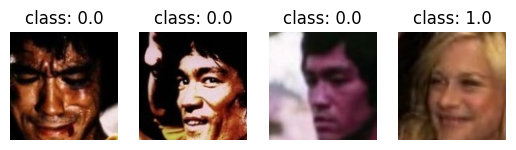

In [ ]:
import numpy as np
import mxnet as mx
from mxnet import recordio
import matplotlib.pyplot as plt

data_iter = mx.image.ImageIter(
    batch_size=4,
    data_shape=(3, 112, 112),
    path_imgrec="./Data/casia-webface/train.rec",
    path_imgidx="./Data/casia-webface/train.idx",
)
data_iter.reset()
for j in range(4):
    batch = data_iter.next()
    data = batch.data[0]
    # print(batch)
    label = batch.label[0].asnumpy()
    for i in range(4):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(data[i].asnumpy().astype(np.uint8).transpose((1, 2, 0)))
        ax.set_title("class: " + str(label[i]))
        plt.axis("off")
    plt.show()

# # ======= Code to show single image =======#
# path_imgrec = "./Data/casia-webface/train.rec"
# path_imgidx = "./Data/casia-webface/train.idx"
# imgrec = recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, "r")
# # %% 1 ~ 409623
# # for i in range(409623):
# for i in range(10):
#     header, s = recordio.unpack(imgrec.read_idx(i + 1))
#     img = mx.image.imdecode(s).asnumpy()
#     plt.imshow(img)
#     plt.title("id=" + str(i) + "label=" + str(header.label))
#     plt.pause(0.1)

## Command Line Interpretation

- **`CUDA_VISIBLE_DEVICES`** : Enter the GPU ID (`0`, `1`, `2`, `3`).

- **`-w` (`--workers_id`)** : Enter the Worker ID (`0`, `1`, `2`, `3`) [Same as GPU ID].

- **`-b` (`--batch_size`)** : Batch Size. Change according to GPU memory.

- **`-d` (`--data_mode`)** : Use which Database [`casia`, `retina`]

- **`-n` (`--net`)** : Which Network [`VIT`, `VITs`, `EffNet_V2_face`, `EffNet_V2_VIT`, `EffNet_V1_VIT`, `EffNet_trim_VIT`, `CROSSVIT`].

- **`--outdir` (Output Directory)** : Change the `output_dir` to the name of the dataset in the `./results/<network_name>_<output_dir>_cosface_sx`.


### EfficientNet


In [ ]:
!CUDA_VISIBLE_DEVICES='0' python3 -u train.py -b 8 -w 0 -d casia -n EffNet_V2_face -head CosFace --outdir ./results/EffNet_V2_face_casia_cosface_s1 --warmup-epochs 0 --lr 3e-5

### EfficientNet + ViT


In [ ]:
!CUDA_VISIBLE_DEVICES='0' python3 -u train.py -b 8 -w 0 -d casia -n EffNet_trim_VIT -head CosFace --outdir ./results/EfficientNet_Trim_ViT_casia_cosface_s1 --warmup-epochs 0 --lr 3e-5